# Logistic Regression Implementation from Scratch

This notebook demonstrates the implementation of Logistic Regression for binary classification using:
- Custom implementation of gradient descent optimization
- Visualization of decision boundaries
- Cost function monitoring

Originally created by hilmi, adapted to Jupyter notebook format.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(0)

## 1. Generating the Dataset
We'll create a synthetic dataset with two classes, each following a different multivariate normal distribution.

In [2]:
# Number of samples per class
n_samples = 100

# Generate features for class 0
mean0 = [2, 2]
cov0 = [[1, 0.5], [0.5, 1]]
X0 = np.random.multivariate_normal(mean0, cov0, n_samples)
y0 = np.zeros(n_samples)

# Generate features for class 1
mean1 = [4, 4]
cov1 = [[1, 0.5], [0.5, 1]]
X1 = np.random.multivariate_normal(mean1, cov1, n_samples)
y1 = np.ones(n_samples)

# Combine the data
X = np.vstack((X0, X1))
y = np.hstack((y0, y1))

## 2. Visualizing the Data
Let's plot our synthetic dataset to see the distribution of the two classes.

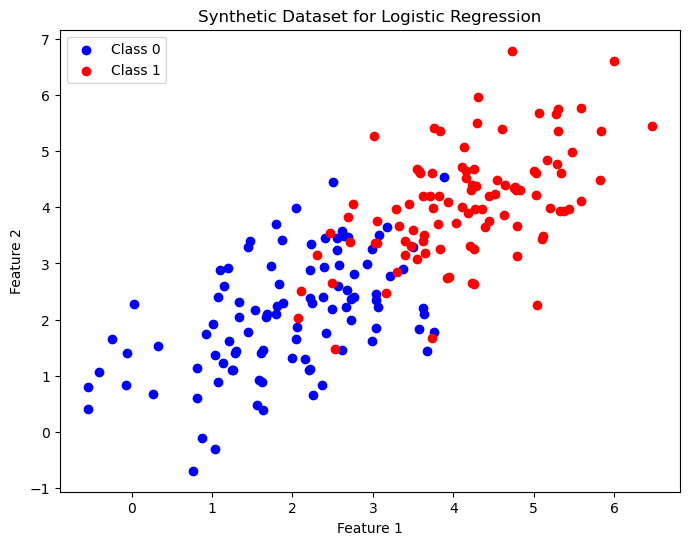

In [3]:
plt.figure(figsize=(8,6))
plt.scatter(X0[:, 0], X0[:, 1], color='blue', label='Class 0')
plt.scatter(X1[:, 0], X1[:, 1], color='red', label='Class 1')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Synthetic Dataset for Logistic Regression')
plt.legend()
plt.show()

## 3. Implementing Logistic Regression
We'll implement three key components:
1. Sigmoid function for probability estimation
2. Cost function for binary cross-entropy
3. Gradient descent optimization

In [4]:
def sigmoid(z):
    """Sigmoid activation function"""
    return 1 / (1 + np.exp(-z))

def compute_cost(X, y, theta):
    """
    Compute binary cross-entropy loss
    
    Parameters:
    X: Feature matrix with intercept term
    y: Target labels (0 or 1)
    theta: Model parameters
    """
    m = len(y)
    z = np.dot(X, theta)
    h = sigmoid(z)
    # To avoid log(0), add a small epsilon inside the log
    epsilon = 1e-5
    cost = -(1/m) * np.sum(y*np.log(h + epsilon) + (1 - y)*np.log(1 - h + epsilon))
    return cost

def gradient_descent(X, y, theta, alpha, num_iters):
    """
    Perform gradient descent optimization
    
    Parameters:
    X: Feature matrix with intercept term
    y: Target labels (0 or 1)
    theta: Initial model parameters
    alpha: Learning rate
    num_iters: Number of iterations
    
    Returns:
    theta: Optimized model parameters
    cost_history: List of costs at each iteration
    """
    m = len(y)
    cost_history = []
    
    for i in range(num_iters):
        z = np.dot(X, theta)
        h = sigmoid(z)
        gradient = np.dot(X.T, (h - y)) / m
        theta -= alpha * gradient
        cost = compute_cost(X, y, theta)
        cost_history.append(cost)
        
        if i % 1000 == 0:
            print(f'Cost at iteration {i}: {cost}')
    
    return theta, cost_history

## 4. Training the Model
Now we'll prepare the data and train our logistic regression model.

In [5]:
# Add intercept term to X
X_intercept = np.hstack((np.ones((X.shape[0], 1)), X))

# Initialize theta parameters to zeros
theta_initial = np.zeros(X_intercept.shape[1])

# Set hyperparameters
alpha = 0.1        # Learning rate
num_iters = 10000  # Number of iterations

# Train the model
theta_final, cost_history = gradient_descent(X_intercept, y, theta_initial, alpha, num_iters)

print(f'\nFinal parameters: {theta_final}')

Cost at iteration 0: 0.6522953807516751
Cost at iteration 1000: 0.2792108775691453
Cost at iteration 2000: 0.25133142708083056
Cost at iteration 3000: 0.2420989995702005
Cost at iteration 4000: 0.23791376415448245
Cost at iteration 5000: 0.23572135055063434
Cost at iteration 6000: 0.2344731807807004
Cost at iteration 7000: 0.23372339852390978
Cost at iteration 8000: 0.23325597969329054
Cost at iteration 9000: 0.23295665708560376

Final parameters: [-9.81309406  2.04282461  1.14079806]


## 5. Visualizing the Decision Boundary
We'll create a function to plot the decision boundary along with the data points.

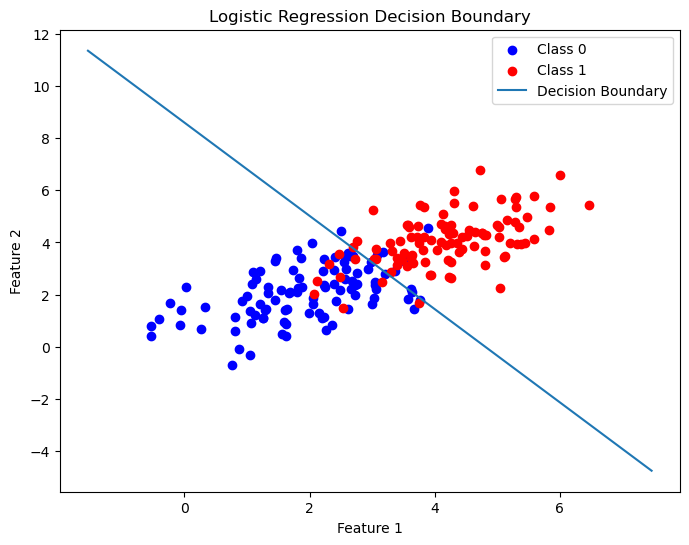

In [6]:
def plot_decision_boundary(X, y, theta):
    plt.figure(figsize=(8,6))
    
    # Plot the data points
    plt.scatter(X[y==0][:,1], X[y==0][:,2], color='blue', label='Class 0')
    plt.scatter(X[y==1][:,1], X[y==1][:,2], color='red', label='Class 1')
    
    # Plot the decision boundary
    x_values = [np.min(X[:,1]-1), np.max(X[:,1]+1)]
    y_values = - (theta[0] + np.dot(theta[1], x_values)) / theta[2]
    plt.plot(x_values, y_values, label='Decision Boundary')
    
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Logistic Regression Decision Boundary')
    plt.legend()
    plt.show()

plot_decision_boundary(X_intercept, y, theta_final)

## 6. Plotting Cost Function Over Iterations
Finally, let's visualize how the cost function decreased during training.

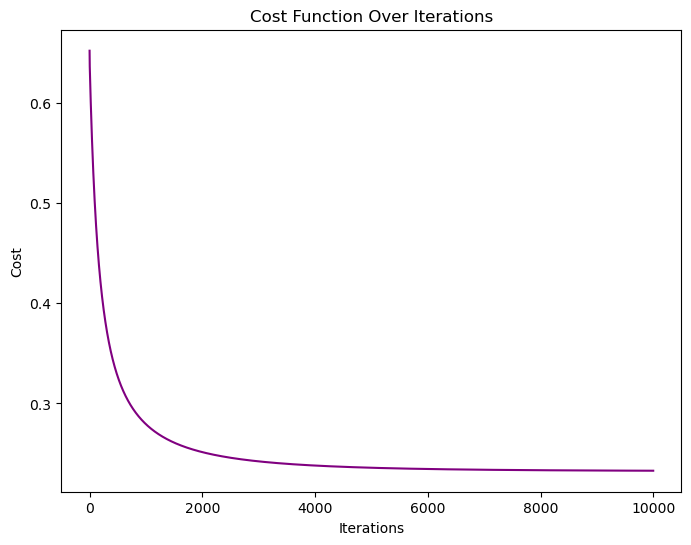

In [7]:
plt.figure(figsize=(8,6))
plt.plot(range(num_iters), cost_history, color='purple')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function Over Iterations')
plt.show()